# This is my First and simple project on Machine Learning by using MLDLC


# **These** are Libraries

In [36]:
import numpy as np
import pandas as pd

# **Frame the Problem Step#1**

In [38]:
df= pd.read_csv('/student_data.csv')
df.info()  # this function is used to find the types of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       5000 non-null   object 
 1   IQ         5000 non-null   int64  
 2   GPA        5000 non-null   float64
 3   Placement  5000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 156.4+ KB


# **this is the Pre-Processing  Step#2**




In [39]:
df=df.iloc[:,1:]
df.head()            #we remove the NAme column just to do the Preprocssing!

,IQ,GPA,Placement
0,141,2.36,1
1,94,3.63,0
2,146,2.96,0
3,141,3.08,1
4,103,3.65,1


# This is the **EDA** Step#3

In [40]:
import matplotlib.pyplot as plt                 # this is Data exploratory Analysis

how does the data look mathematically

In [41]:
df.describe()

,IQ,GPA,Placement
count,5000.000000,5000.000000,5000.000000
mean,115.061200,2.992450,0.497200
std,20.618741,0.578584,0.500042
min,80.000000,2.000000,0.000000
25%,97.000000,2.490000,0.000000
50%,115.000000,2.990000,0.000000
75%,133.000000,3.492500,1.000000
max,150.000000,4.000000,1.000000


Find the duplicated values

In [42]:
df.duplicated( ).sum()

400

check the Null/Missing values and sum them


In [43]:
df.isnull().sum()

,0
IQ,0
GPA,0
Placement,0


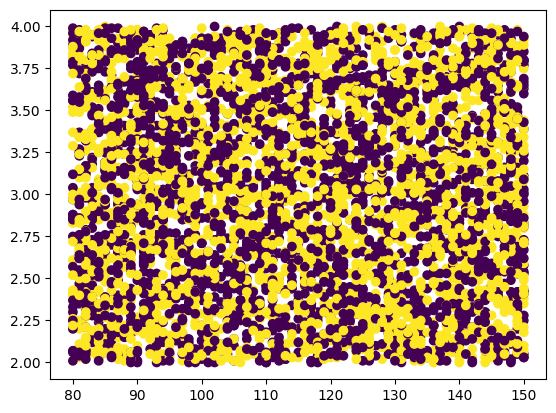

In [44]:
plt.scatter(df["IQ"],df["GPA"],c=df["Placement"]) # change the colors to differentiate between values !


In [45]:
x=df.iloc[:,0:2]                #Separation of the columns
y=df.iloc[:,-1]

In [47]:
x

,IQ,GPA
0,141,2.36
1,94,3.63
2,146,2.96
3,141,3.08
4,103,3.65
...,...,...
4995,141,2.34
4996,137,2.12
4997,104,3.04
4998,128,2.24


# This is the Split the dataset into Training and Testing !**** Step#4


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  #10% of the data is used for Testing

Test data is showing like this

In [50]:
y_test

,Placement
4438,1
2087,1
2284,0
824,1
1487,0
...,...
1828,0
4132,0
381,1
429,0


# **Scaling** Step#5

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()


In [53]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
x_train                   # this technique is to set values in range

array([[-0.4367277 ,  1.58107476],
       [-0.04925241, -0.38917168],
       [ 0.62882934,  1.47737757],
       ...,
       [ 0.04761641,  0.18116282],
       [ 0.24135405, -1.61625498],
       [ 1.3069111 , -0.66569749]])

# **Train the Model** Step#6

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression()

In [57]:
clf.fit(x_train,y_train)

LogisticRegression()

In [58]:
from sklearn.metrics import accuracy_score
x_pred=clf.predict(x_test)
accuracy_score(y_test,x_pred)               #the accuracy is not Efficient so we will apply different alogrithms to improve the accuracy

0.502

# **Visualizeing Patterns** Step#7

In [59]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

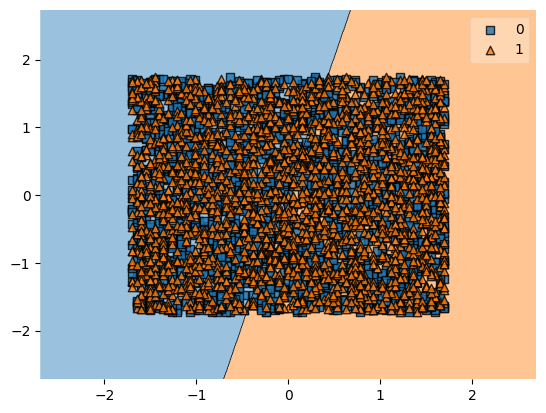

In [60]:
plot_decision_regions(x_train,y_train.values,clf=clf)